In [ ]:
# 일자별 차트 크롤링
# 1등 가져오기
# 전체 순위가져 오기 

In [ ]:
# 순위에 따라서 점수 부여
# 1등 -> 100점, 100등 -> 1점

In [ ]:
# 특정 기간내에 차트 진입 점수 계산
# 예) 15일간 차트 분석 
# 12월12 일 -> 아이유 150 점, 12월 11일 -> 아이유 160점, 12월 1일  아이유 누적점수 ~~점
# 누적된 점수별 아티스트 계산  상위 10명 을 히스토 그램으로 그려 보세요.

In [5]:
from urllib.request import urlopen
import requests
from bs4 import BeautifulSoup

In [21]:
import pandas as pd

In [57]:
dates=pd.date_range('2022-12-01','2022-12-12',freq='D')

In [58]:
dates=[i.strftime("%Y%m%d") for i in dates]

In [53]:
date

['20221201',
 '20221202',
 '20221203',
 '20221204',
 '20221205',
 '20221206',
 '20221207',
 '20221208',
 '20221209',
 '20221210',
 '20221211',
 '20221212']

In [6]:
for i in range(len(date)):
    url="https://music.bugs.co.kr/chart/track/day/total?chartdate="+date[i]
    raw = requests.get(url)
    bs=BeautifulSoup(raw.text, "html.parser")
    box=bs.find('tbody')
    title=box.find_all('p',{'class': 'title'})
    singer=box.find_all('p',{'class': 'artist'})
    rank=box.find_all('strong')
    Bugs=[]

    for j in range(len(title)):
        a=rank[j].text.replace("\n", "")
        A=title[j].text.replace("\n", "")
        B=singer[j].text.replace("\n", "")
        score=100-(int(a)-1)
        Bugs.append({"랭킹":a, "제목": A,"가수": B,"점수":score})
        
        if Bugs == []:
            BBugs=pd.DataFrame(Bugs)
        else: 
            BBugs.concat(B)        

In [13]:
box.find_all('p',{'class': 'title'})[1].text.replace("\n", "")
#text를 치면 '\nHype Boy\n' 처럼 나온다.
# 따라서 replace 메서드를 적용한다.

'Hype Boy'

In [19]:
title=box.find_all('p',{'class': 'title'})
singer=box.find_all('p',{'class': 'artist'})
rank=box.find_all('strong')

In [20]:
Bugs=[]

for i in range(len(title)):
    a=rank[i].text.replace("\n", "")
    A=title[i].text.replace("\n", "")
    B=singer[i].text.replace("\n", "")
    score=100-(int(a)-1)
    Bugs.append({"랭킹":a, "제목": A,"가수": B,"점수":score})


[{'랭킹': '1', '제목': '사건의 지평선', '가수': '윤하(Younha/ユンナ)', '점수': 100}, {'랭킹': '2', '제목': 'Hype Boy', '가수': 'NewJeans', '점수': 99}, {'랭킹': '3', '제목': 'WHEN I MOVE', '가수': '카라(Kara)', '점수': 98}, {'랭킹': '4', '제목': 'ANTIFRAGILE', '가수': 'LE SSERAFIM (르세라핌)', '점수': 97}, {'랭킹': '5', '제목': 'After LIKE', '가수': 'IVE (아이브)', '점수': 96}, {'랭킹': '6', '제목': 'Attention', '가수': 'NewJeans', '점수': 95}, {'랭킹': '7', '제목': 'Nxde', '가수': '(여자)아이들', '점수': 94}, {'랭킹': '8', '제목': 'Dreamers [Music from the FIFA World Cup Qatar 2022 Official Soundtrack] (feat. FIFA Sound)', '가수': '정국\r정국\r ', '점수': 93}, {'랭킹': '9', '제목': 'LOVE DIVE', '가수': 'IVE (아이브)', '점수': 92}, {'랭킹': '10', '제목': 'All I Want for Christmas Is You', '가수': 'Mariah Carey(머라이어 캐리)', '점수': 91}, {'랭킹': '11', '제목': 'Snowman', '가수': 'Sia(시아)', '점수': 90}, {'랭킹': '12', '제목': 'Shut Down', '가수': 'BLACKPINK', '점수': 89}, {'랭킹': '13', '제목': '새삥 (Prod. ZICO) (Feat. 호미들)', '가수': '지코', '점수': 88}, {'랭킹': '14', '제목': 'Santa Tell Me', '가수': 'Ariana Grande(아리아나 그란데)', '점수'

In [22]:
BBugs=pd.DataFrame(Bugs)

In [23]:
BBugs

,랭킹,제목,가수,점수
0,1,사건의 지평선,윤하(Younha/ユンナ),100
1,2,Hype Boy,NewJeans,99
2,3,WHEN I MOVE,카라(Kara),98
3,4,ANTIFRAGILE,LE SSERAFIM (르세라핌),97
4,5,After LIKE,IVE (아이브),96
...,...,...,...,...
95,96,MY BAG,(여자)아이들,5
96,97,흩어지지 않게,엠씨더맥스 (M.C the MAX),4
97,98,가을밤에 든 생각,잔나비,3
98,99,모든 계절은 너였다,길구봉구,2


In [24]:
BBugs.set_index('랭킹', inplace=True)

In [26]:
BBugs

,제목,가수,점수
랭킹,,,
1,사건의 지평선,윤하(Younha/ユンナ),100
2,Hype Boy,NewJeans,99
3,WHEN I MOVE,카라(Kara),98
4,ANTIFRAGILE,LE SSERAFIM (르세라핌),97
5,After LIKE,IVE (아이브),96
...,...,...,...
96,MY BAG,(여자)아이들,5
97,흩어지지 않게,엠씨더맥스 (M.C the MAX),4
98,가을밤에 든 생각,잔나비,3


In [60]:
df_BBugs=pd.DataFrame()
for date in tqdm.tqdm(dates):
    url="https://music.bugs.co.kr/chart/track/day/total?chartdate="+str(date)
    raw = requests.get(url)
    bs=BeautifulSoup(raw.text, "html.parser")
    box=bs.find('tbody')
    title=box.find_all('p',{'class': 'title'})
    singer=box.find_all('p',{'class': 'artist'})
    rank=box.find_all('strong')
    Bugs=[]
    
    for j in range(len(title)):
        a=rank[j].text.replace("\n", "")
        A=title[j].text.replace("\n", "")
        B=singer[j].text.replace("\n", "")
        score=100-(int(a)-1)
        Bugs.append({"날짜": date,"랭킹":a, "제목": A,"가수": B,"점수":score})
        #Bugs_Day
        BBugs=pd.DataFrame(Bugs)
        df_BBugs=pd.concat([df_BBugs,BBugs])


100%|██████████| 12/12 [00:06<00:00,  1.80it/s]


In [61]:
df_BBugs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60600 entries, 0 to 99
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      60600 non-null  object
 1   랭킹      60600 non-null  object
 2   제목      60600 non-null  object
 3   가수      60600 non-null  object
 4   점수      60600 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.8+ MB


In [62]:
df_BBugs_top=df_BBugs.groupby(["가수"]).sum().sort_values("점수", ascending=False).head(10)

/tmp/ipykernel_302/80497624.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_BBugs_top=df_BBugs.groupby(["가수"]).sum().sort_values("점수", ascending=False).head(10)


In [63]:
df_BBugs_top

,점수
가수,
NewJeans,293803
IVE (아이브),281054
카라(Kara),234836
LE SSERAFIM (르세라핌),216926
윤하(Younha/ユンナ),207706
BLACKPINK,177913
(여자)아이들,170262
Charlie Puth(찰리 푸스),169624
Red Velvet (레드벨벳),161689


TypeError: only size-1 arrays can be converted to Python scalars

findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font famil

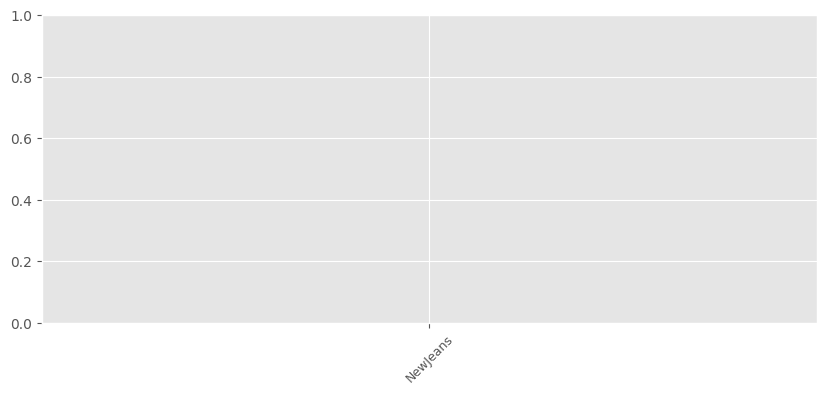

In [65]:
import matplotlib.pyplot as plt
import platform

plt.style.use('ggplot')
plt.figure(figsize=(10, 4))
plt.xticks(size=9, rotation=45)
plt.bar(df_BBugs_top.index, df_BBugs_top)["score"]
plt.title(('hello'), size=15)
plt.ylabel("score")
plt.show()

In [39]:
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 41.8 MB/s eta 0:00:0000:010:01
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 49.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 50.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.1/296.1 KB 36.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 KB 59.9 MB/s eta 0:00:00


In [45]:
!pip install tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 KB 6.5 MB/s eta 0:00:00


In [49]:
import tqdm
import time